In [8]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


file_path = "Electric_Vehicle_Population_Data.csv"  # Adjust with the correct file path
data = pd.read_csv(file_path)


data.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA5L,King,Seattle,WA,98133.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0,46.0,249903111,POINT (-122.35029 47.71871),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,5UX43EU08R,King,Seattle,WA,98125.0,2024,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,39,0,46.0,264762606,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
2,5UX43EU06R,King,Seattle,WA,98102.0,2024,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,39,0,43.0,275506031,POINT (-122.32427 47.63433),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJ3E1EA1J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,1.0,117023581,POINT (-122.22901 47.72201),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,1G1RA6E43C,Thurston,Olympia,WA,98501.0,2012,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,35,0,35.0,158415498,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,5.306701e+10


In [9]:

data.info()
data.describe()

print("Missing values in each column:")
print(data.isnull().sum())


duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220225 entries, 0 to 220224
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         220225 non-null  object 
 1   County                                             220222 non-null  object 
 2   City                                               220222 non-null  object 
 3   State                                              220225 non-null  object 
 4   Postal Code                                        220222 non-null  float64
 5   Model Year                                         220225 non-null  int64  
 6   Make                                               220225 non-null  object 
 7   Model                                              220225 non-null  object 
 8   Electric Vehicle Type                              220225 non-null  object

In [10]:

numerical_cols = data.select_dtypes(include=[np.number]).columns
categorical_cols = data.select_dtypes(include=['object']).columns


data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())


data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])


In [11]:

data = data.drop_duplicates()


In [12]:

for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]


In [13]:

skewness = data[numerical_cols].skew()
print("Skewness of numerical columns:")
print(skewness)

# Applying log transformation to skewed columns
skewed_cols = skewness[skewness > 0.5].index
for col in skewed_cols:
    data[col] = np.log1p(data[col])


Skewness of numerical columns:
Postal Code             1.167973
Model Year             -1.946198
Electric Range          1.991182
Base MSRP               0.000000
Legislative District   -0.553811
DOL Vehicle ID         -0.993555
2020 Census Tract       0.353803
dtype: float64


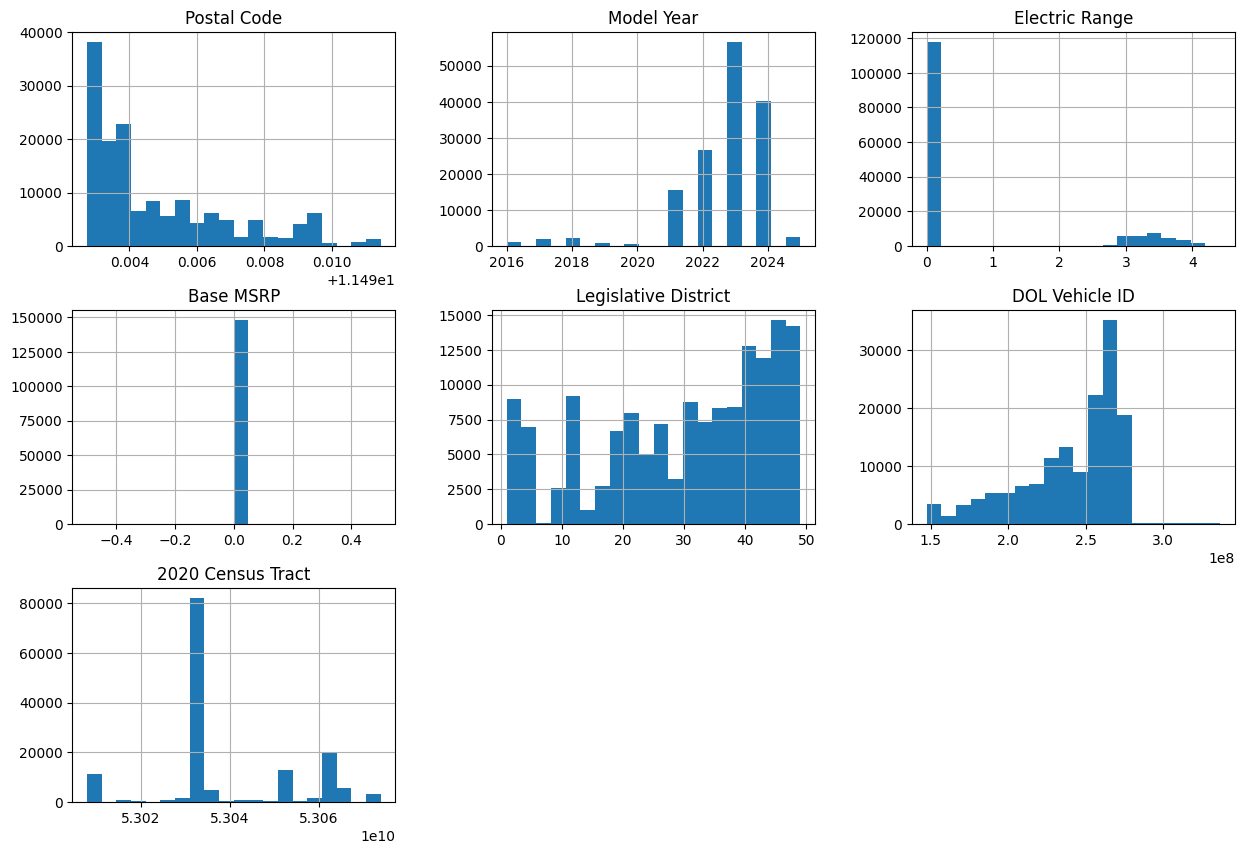

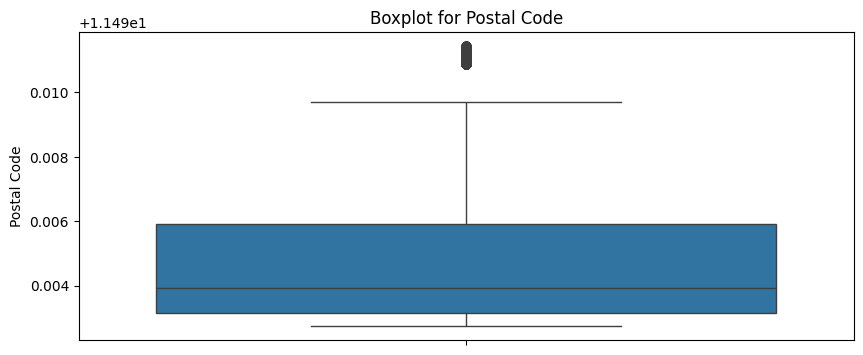

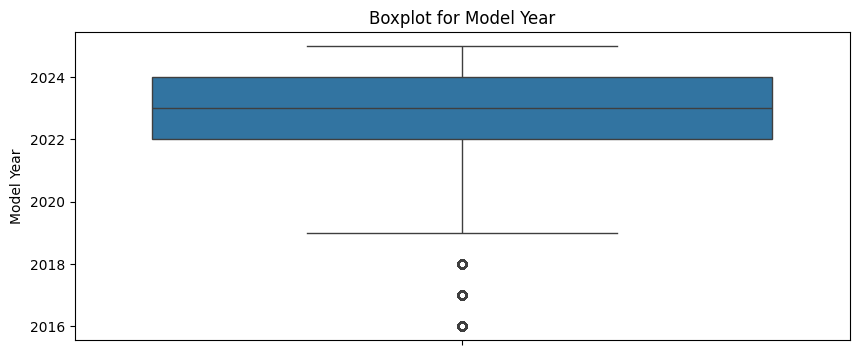

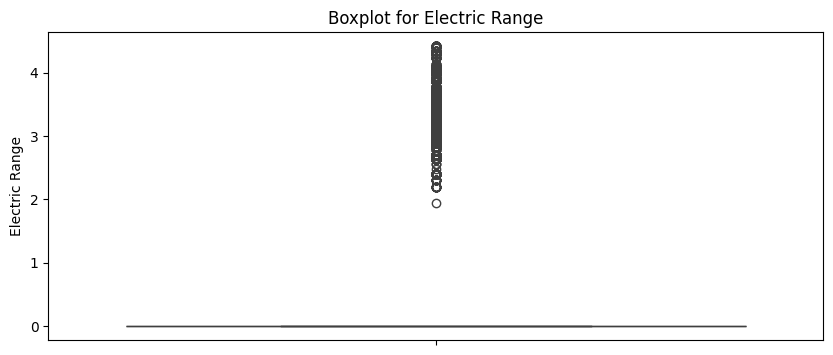

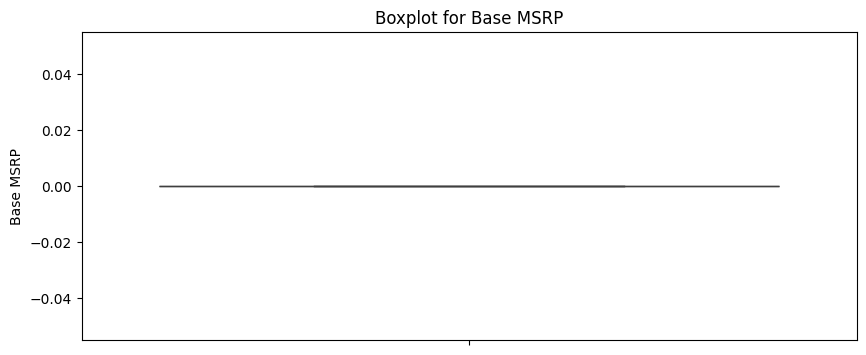

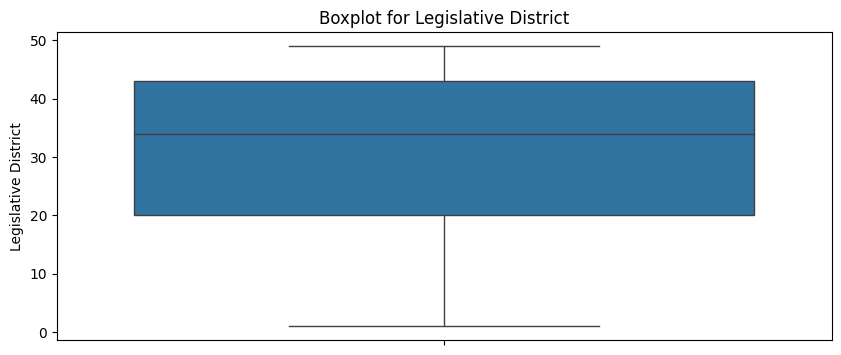

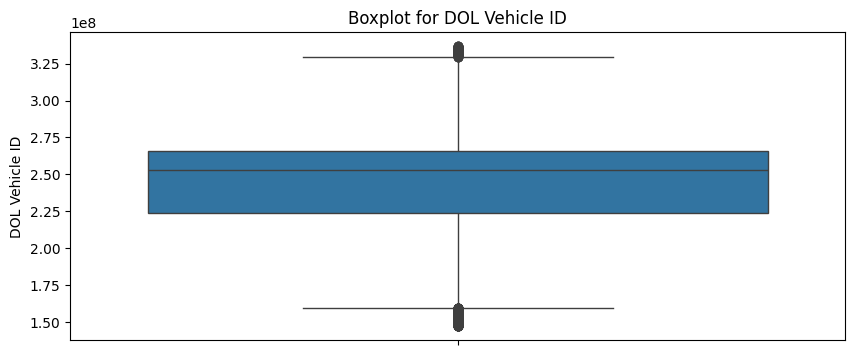

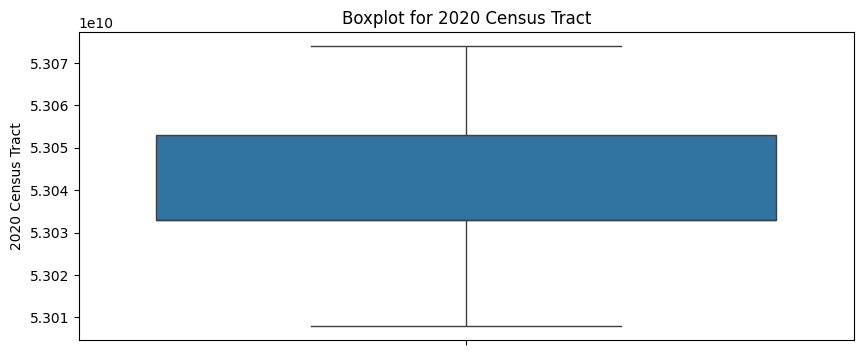

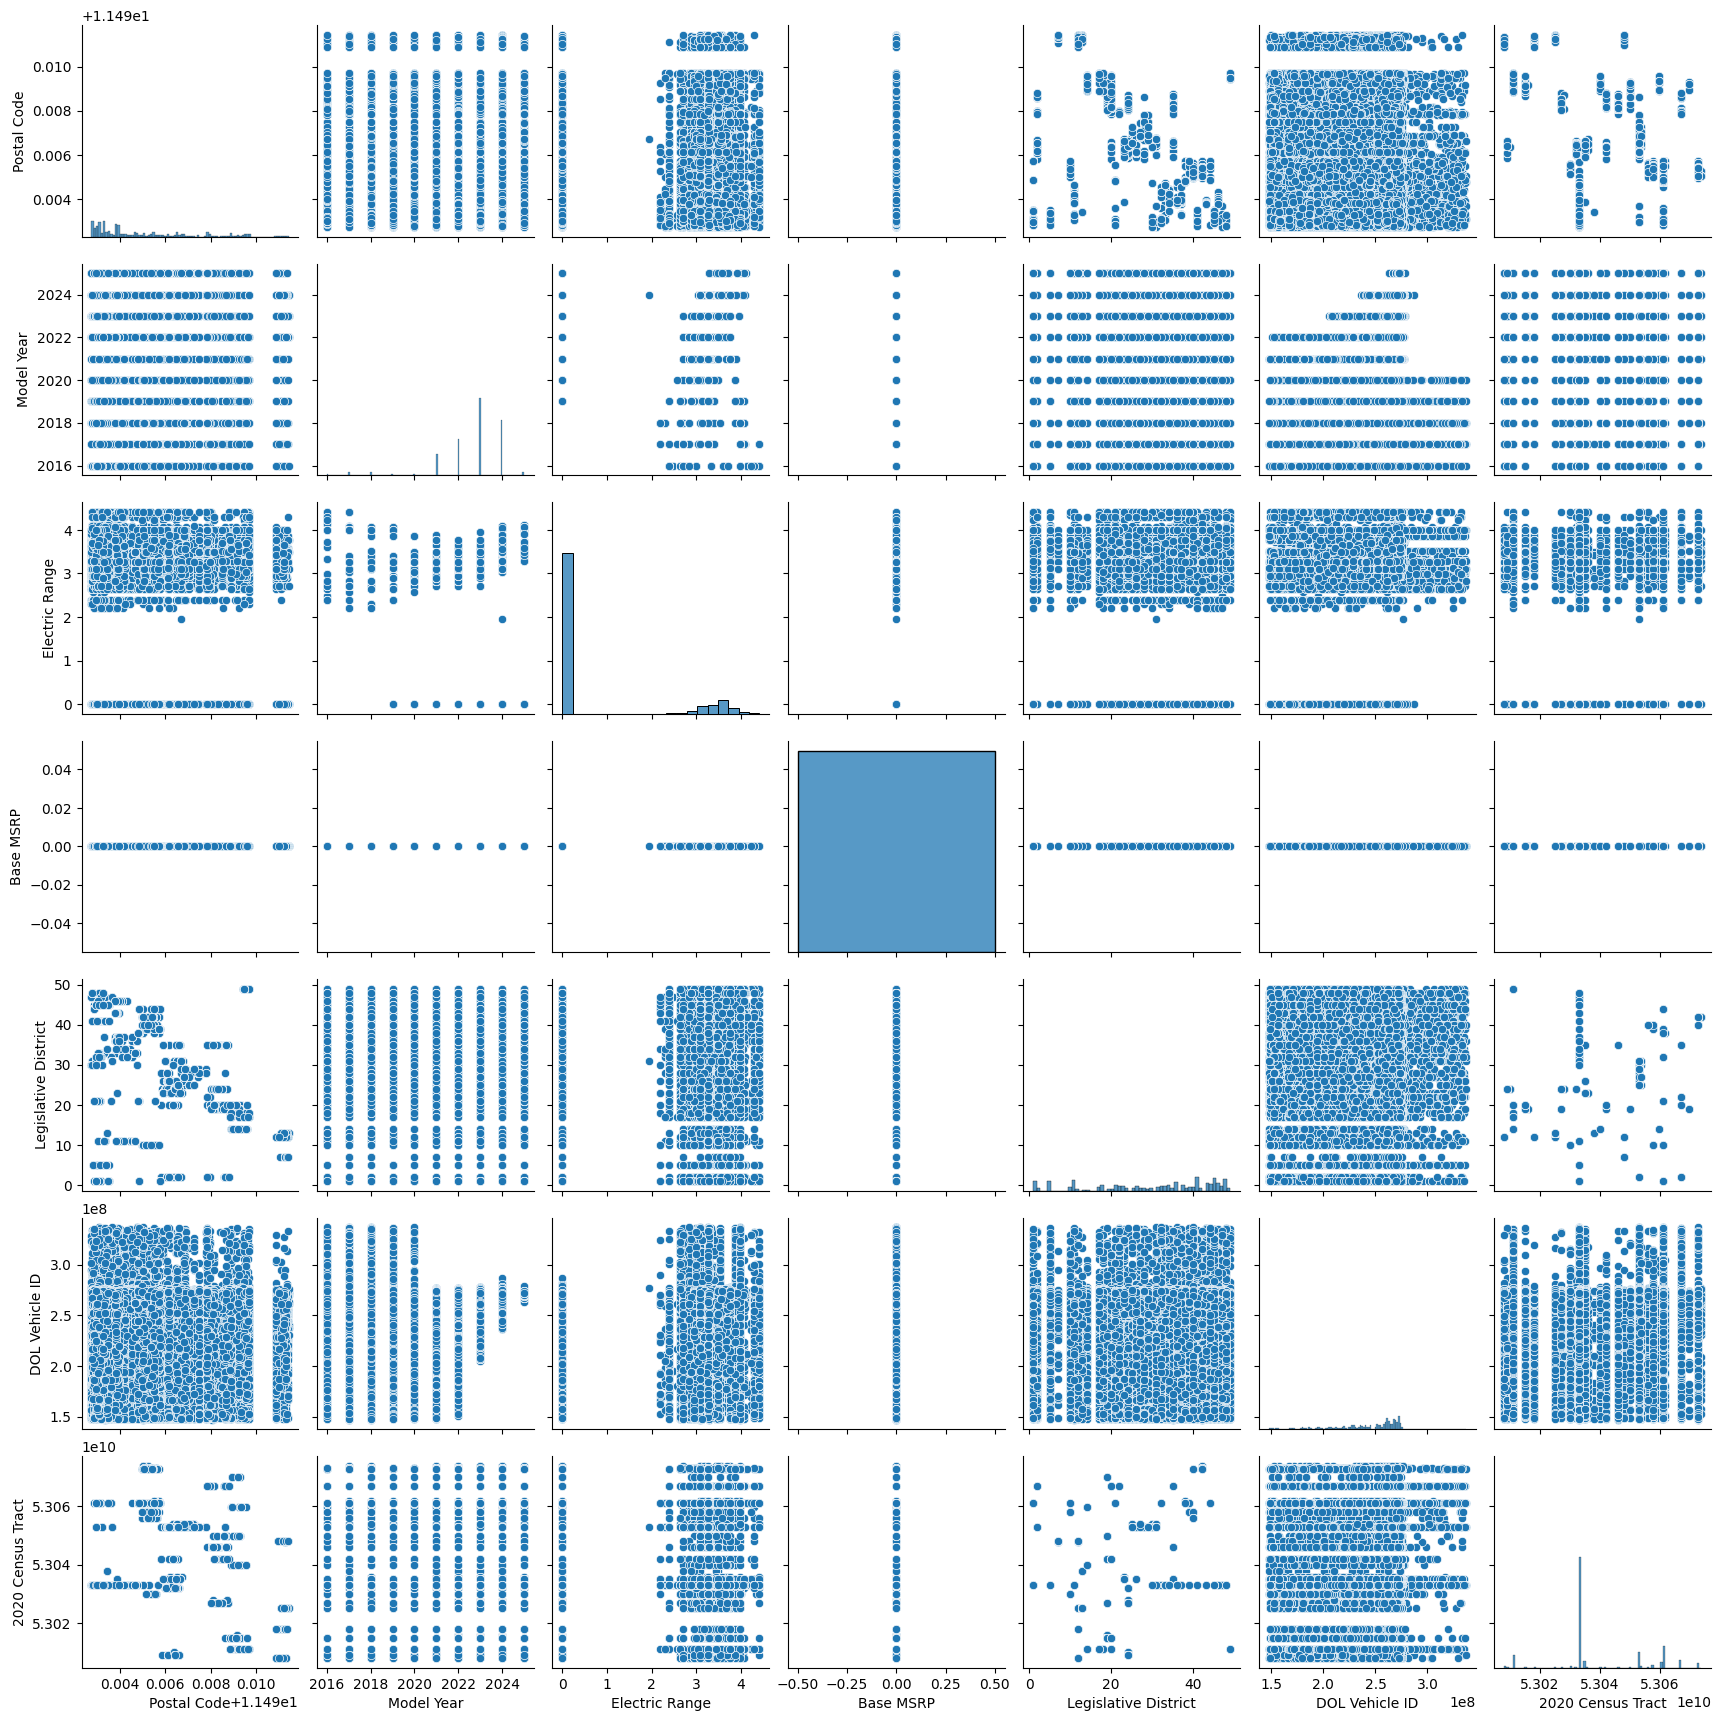

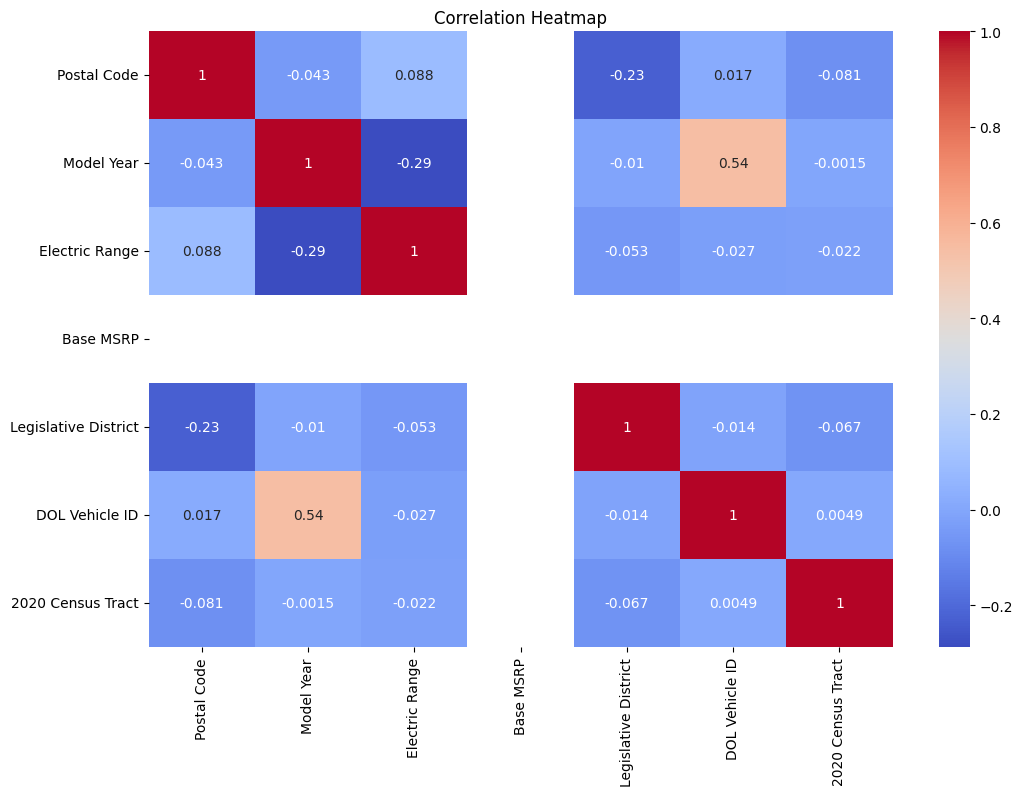

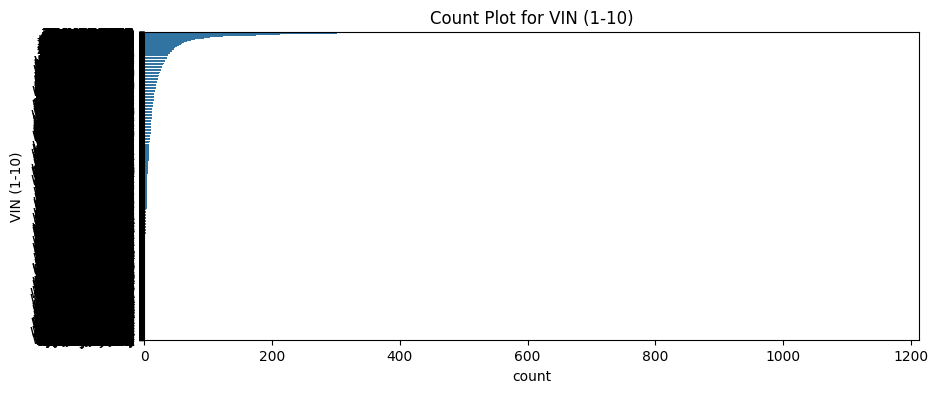

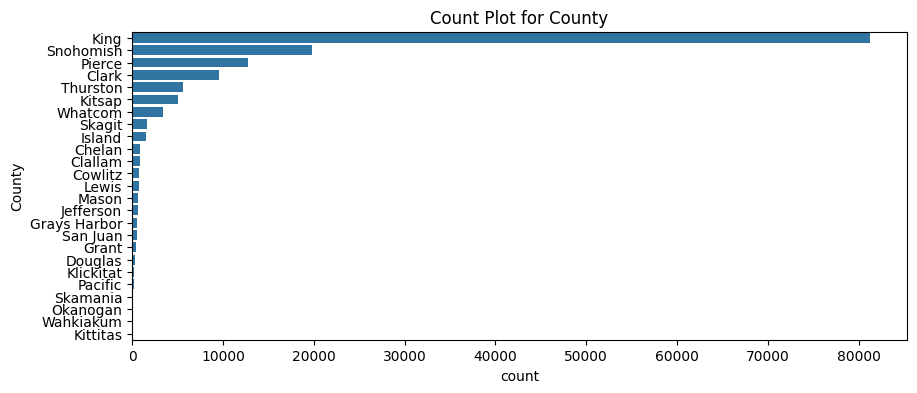

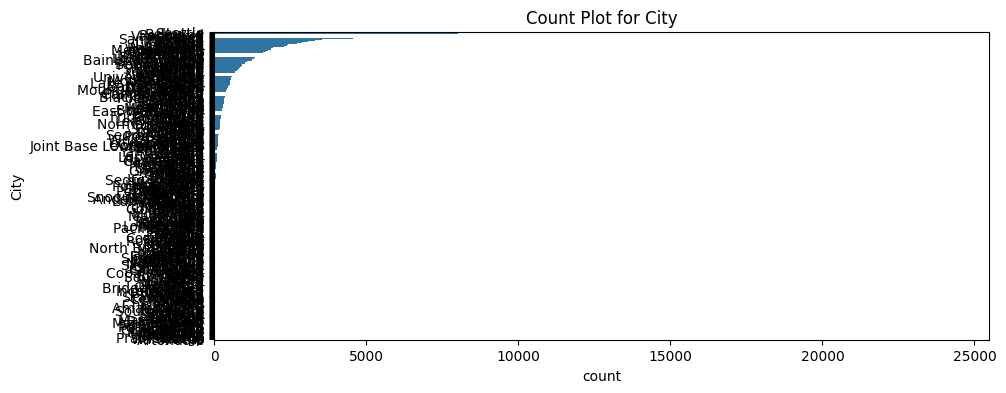

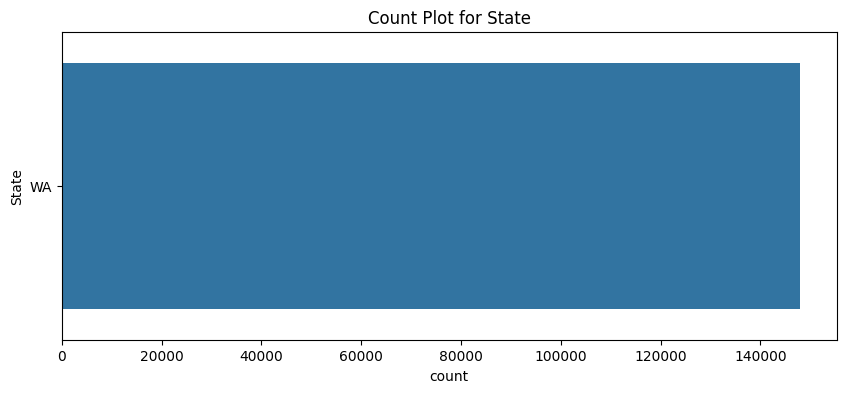

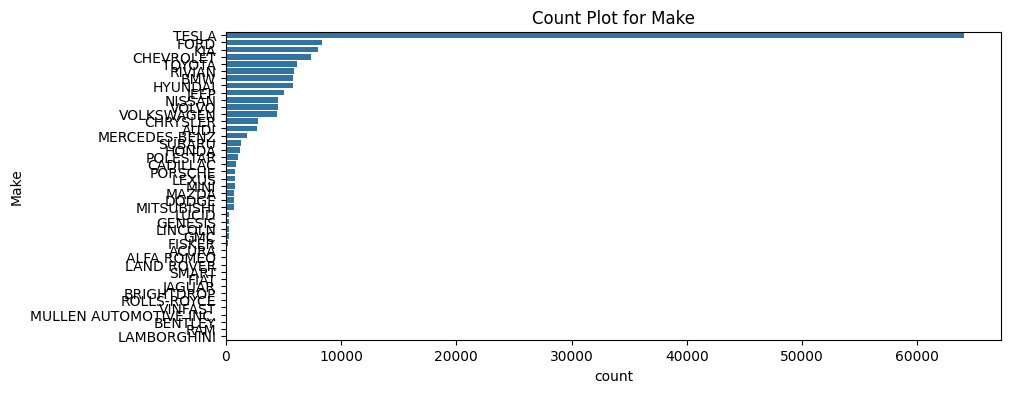

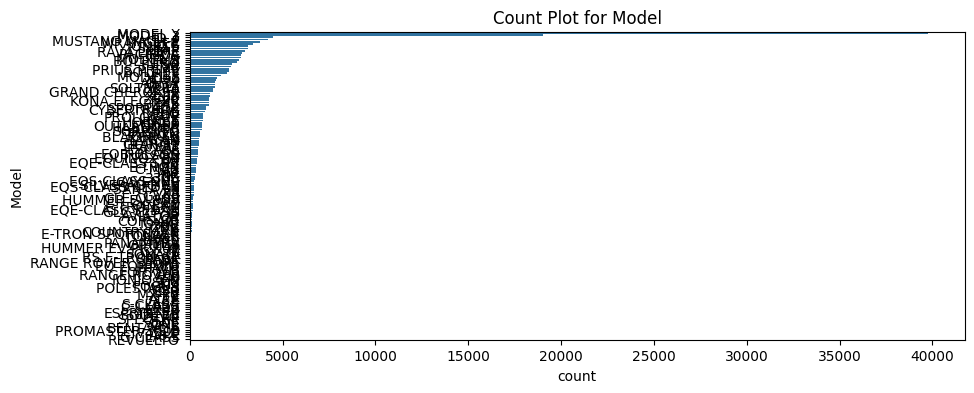

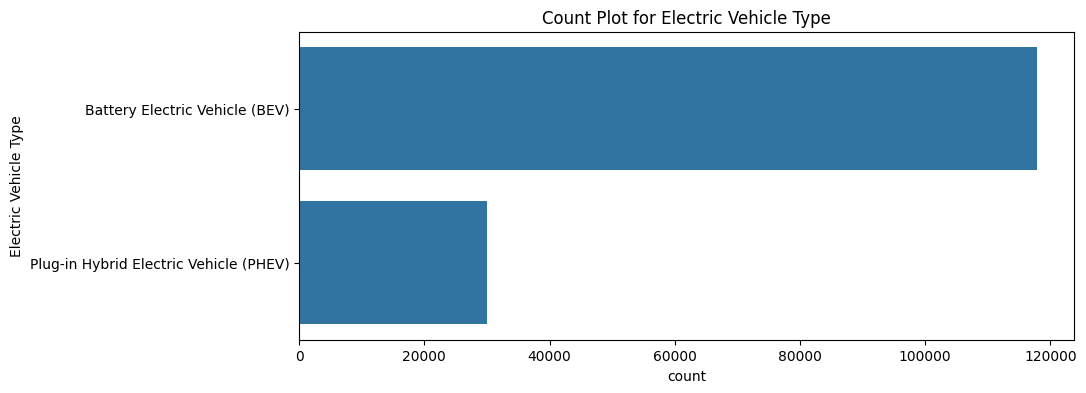

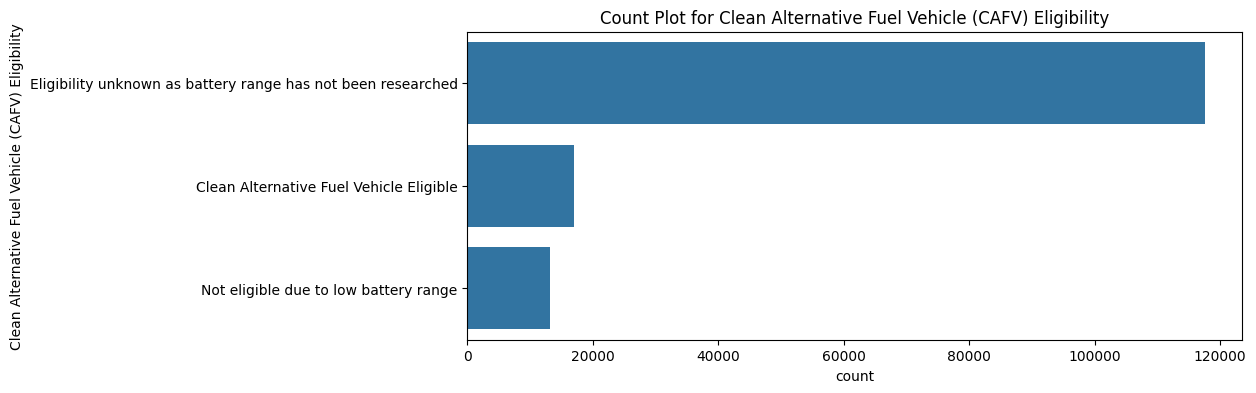

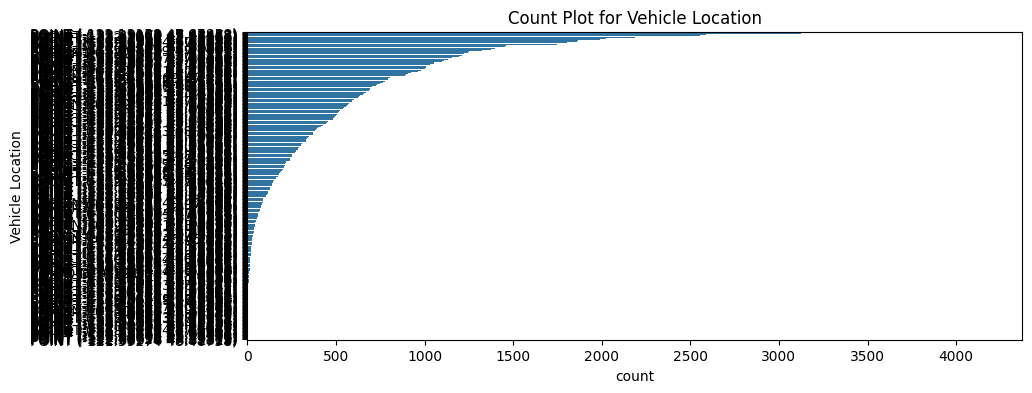

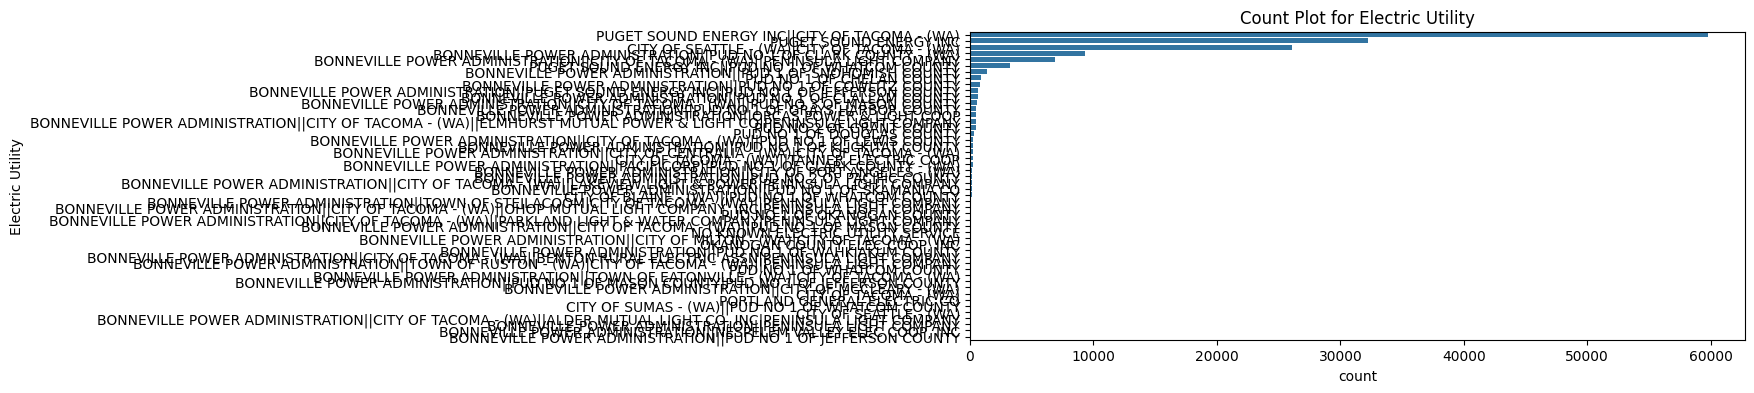

In [14]:

data[numerical_cols].hist(figsize=(15, 10), bins=20)
plt.show()


for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


sns.pairplot(data[numerical_cols])
plt.show()


plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=data[col], order=data[col].value_counts().index)
    plt.title(f'Count Plot for {col}')
    plt.show()


In [15]:

encoded_data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)


encoded_data.head()


,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract,VIN (1-10)_1C4JJXN61P,VIN (1-10)_1C4JJXN62P,VIN (1-10)_1C4JJXN63P,...,"Electric Utility_OKANOGAN COUNTY ELEC COOP, INC",Electric Utility_PORTLAND GENERAL ELECTRIC CO,Electric Utility_PUD NO 1 OF CHELAN COUNTY,Electric Utility_PUD NO 1 OF DOUGLAS COUNTY,Electric Utility_PUD NO 1 OF OKANOGAN COUNTY,Electric Utility_PUD NO 1 OF WHATCOM COUNTY,Electric Utility_PUD NO 2 OF GRANT COUNTY,Electric Utility_PUGET SOUND ENERGY INC,Electric Utility_PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),Electric Utility_PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY
1,11.494008,2024,3.688879,0,46.0,264762606,5.303300e+10,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,11.493773,2024,3.688879,0,43.0,275506031,5.303301e+10,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,11.498725,2024,0.000000,0,20.0,260421878,5.306701e+10,False,False,False,...,False,False,False,False,False,False,False,True,False,False
16,11.495555,2017,3.258097,0,10.0,161367349,5.302997e+10,False,False,False,...,False,False,False,False,False,False,False,True,False,False
19,11.497852,2023,3.091042,0,22.0,258047961,5.306701e+10,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:

encoded_data.to_csv("Processed_EV_Dataset.csv", index=False)


In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd
import numpy as np


In [ ]:

file_path = "Processed_EV_Dataset.csv"
data = pd.read_csv(file_path)


data.head()


X = data.drop('Target_Column', axis=1)  # Features
y = data['Target_Column']              # Target


In [ ]:

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)


feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)


print("Top features by importance:")
print(feature_importances)


import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.show()


In [ ]:

k = 10  
skb = SelectKBest(score_func=f_classif, k=k)
X_selected = skb.fit_transform(X, y)


skb_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': skb.scores_,
    'P-Value': skb.pvalues_
}).sort_values(by='Score', ascending=False)


print(f"Top {k} features by SelectKBest:")
print(skb_scores.head(k))

selected_features = X.columns[skb.get_support()]
print(f"Selected features: {list(selected_features)}")


In [ ]:

common_features = set(feature_importances['Feature'][:k]).intersection(set(selected_features))
print("Common important features identified by both methods:")
print(common_features)


X_reduced = X[list(common_features)]
print("Shape of reduced dataset:", X_reduced.shape)


X_reduced.to_csv("Reduced_EV_Features.csv", index=False)
